In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Categorical Features encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,  LabelEncoder

# Feature scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import  minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Pipline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import RegressorChain

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Ensempling models
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,HistGradientBoostingClassifier


# Loss function 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/final_proj/train.csv"
test_path = "/content/drive/MyDrive/final_proj/test.csv"
train_df = pd.DataFrame(pd.read_csv(train_path))
test_df = pd.DataFrame(pd.read_csv(test_path))

In [ ]:
train_df.drop("id",axis = 1,inplace = True)
test_df.drop("id",axis = 1,inplace = True)

In [ ]:
print("Train columns: ",len(train_df.columns))
print("Test columns: ",len(test_df.columns))

Train columns:  17
Test columns:  16


In [ ]:
#train_df = train_df[(train_df["Class"]==10) | (train_df["Class"]==6) |(train_df["Class"]==8)]

train_df["Class"].iloc[(train_df["Class"] != 10)]=0
train_df["Class"].iloc[(train_df["Class"] == 10)]=1

In [ ]:
train_df["Class"].value_counts()

0    10437
1     3959
Name: Class, dtype: int64

In [ ]:
train_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.00,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,0
1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.00,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,0
2,The Cure,Play For Today,51.00,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,0
3,Miguel Poveda,Coplas Del Querer,40.00,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,0
4,Leif Vollebekk,Long Blue Light,63.00,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,"Ólafur Arnalds, Alice Sara Ott",Verses,42.00,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,0
14392,Citizen Cope,Something to Believe In,50.00,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,1
14393,WurlD,WAYO (KPE LE WU),41.00,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,0
14394,Rafferty,Making a Home,48.00,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14045 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12784 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10837 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [ ]:
train_df["Popularity"] = train_df["Popularity"] / 100
test_df["Popularity"] = test_df["Popularity"] / 100

In [ ]:
train_df = train_df.drop_duplicates()

*******************************************************

In [ ]:
track=train_df[["Track Name", "Class"]]

In [ ]:
track

,Track Name,Class
2,Play For Today,6
5,Every Little Thing She Does Is Magic,10
8,Welcome To The Jungle,10
10,Unseen,6
12,Cute Without The 'E' (Cut From The Team),10
...,...,...
14387,Walk,10
14388,Invisible Sun,10
14390,Getting Over It,10
14392,Something to Believe In,10


In [ ]:
train_df[train_df["Track Name"]=="◊õ◊õ◊î ◊ñ◊î (◊ú◊ê◊î◊ï◊ë ◊ê◊ï◊™◊ö)"]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
919,Berry Sakharof,◊õ◊õ◊î ◊ñ◊î (◊ú◊ê◊î◊ï◊ë ◊ê◊ï◊™◊ö),0.44,0.474,0.885,2.0,-7.999,1,0.0769,0.0174,0.00178,0.128,0.438,160.060,253840.0,4,10
7146,Nurit Galron,◊õ◊õ◊î ◊ñ◊î (◊ú◊ê◊î◊ï◊ë ◊ê◊ï◊™◊ö),0.28,0.564,0.316,7.0,-10.147,1,0.0315,0.6350,0.00640,0.128,0.183,139.908,223080.0,4,10


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
counter = Counter(track['Track Name'].tolist())
counter

Counter({'Play For Today': 1,
         'Every Little Thing She Does Is Magic': 1,
         'Welcome To The Jungle': 1,
         'Unseen': 1,
         "Cute Without The 'E' (Cut From The Team)": 1,
         'Moonlit and Devious': 1,
         'No One Knows': 1,
         'Chinatown (feat. Bruce Springsteen)': 2,
         'AVERAGE DEATH': 1,
         'Dez Moines': 1,
         '◊ê◊™ ◊ú◊ê': 1,
         'Let It Grow': 1,
         'I Wanna Go Out': 1,
         'Z√ºleyha': 1,
         'Filthy': 1,
         'Yam Yam': 1,
         'Celestial': 1,
         'Dmoot': 1,
         'The Quartz Grave': 1,
         '◊°◊ô◊ì◊ï◊®◊ô◊ù ◊©◊ú ◊û◊ë◊ï◊í◊®◊ô◊ù': 1,
         'Next To Nothing': 1,
         'Heavy Is The Crown': 1,
         'Run to the Hills - 1998 Remastered Version': 2,
         'Side': 1,
         'Deathcrush': 1,
         'Red Hot': 1,
         'Biohazard': 2,
         'ON MY OWN': 1,
         'Arabian Knights': 1,
         'Blurry': 1,
         'Hey Leonardo (She Likes Me For Me)': 1,
         '

******************************************************

In [ ]:
def artist_name_imputing_dic(data, artist_col = "Artist Name"):
  artist_col_ = list(train_df[artist_col].value_counts().index)
  length = len(artist_col_)
  label_list = {name:i for name , i in zip(artist_col_,range(length))}
  return label_list

In [ ]:
def artist_imputer(data, label_list, artist_col = "Artist Name"):
  list1 = list(data[artist_col])
  res = []
  for name in list1:
    if name in list(label_list.keys()):
      label = label_list[name]
    else:
      label = len(label_list)
    res = res + [label]
  return pd.DataFrame(res)

In [ ]:
train_df = train_df.applymap(lambda x:x.lower() if type(x) == str else x)
test_df = test_df.applymap(lambda x:x.lower() if type(x) == str else x)

In [ ]:
label_list_ = artist_name_imputing_dic(data = train_df , artist_col = "Artist Name")

In [ ]:
train=artist_imputer(data = train_df, label_list=label_list_, artist_col = "Artist Name")
test=artist_imputer(data = test_df, label_list=label_list_, artist_col = "Artist Name")

In [ ]:
train_df.reset_index(inplace= True)

In [ ]:
train_df

,index,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"lata mangeshkar, hariharan",likha hai yeh,0.23,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,0
1,1,kalan.frfr,no love ft. mozzy & cypress moreno,0.45,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,0
2,2,the cure,play for today,0.51,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,0
3,3,miguel poveda,coplas del querer,0.40,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,0
4,4,leif vollebekk,long blue light,0.63,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,14391,"ólafur arnalds, alice sara ott",verses,0.42,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,0
13860,14392,citizen cope,something to believe in,0.50,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,1
13861,14393,wurld,wayo (kpe le wu),0.41,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,0
13862,14394,rafferty,making a home,0.48,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,0


In [ ]:
train_df["Artist Name"] = train
test_df["Artist Name"] = test

In [ ]:
train_df.drop("index",axis=1,inplace= True)
train_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,5000,likha hai yeh,0.23,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,0
1,1016,no love ft. mozzy & cypress moreno,0.45,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,0
2,60,play for today,0.51,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,0
3,2376,coplas del querer,0.40,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,0
4,5970,long blue light,0.63,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,3161,verses,0.42,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,0
13860,2213,something to believe in,0.50,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,1
13861,7887,wayo (kpe le wu),0.41,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,0
13862,1519,making a home,0.48,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,0


In [ ]:
train_df_ = train_df.drop(["Track Name"], axis = 1 )
test_df_ = test_df.drop(["Track Name"], axis = 1 )

In [ ]:
x_ = train_df_.iloc[:,train_df_.columns != "Class"]
y_ = train_df_[["Class"]].copy()

In [ ]:
x_test = test_df_.iloc[:,test_df_.columns != "Class"]

In [ ]:
x_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13864 entries, 0 to 13863
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         13864 non-null  int64  
 1   Popularity          13521 non-null  float64
 2   danceability        13864 non-null  float64
 3   energy              13864 non-null  float64
 4   key                 12313 non-null  float64
 5   loudness            13864 non-null  float64
 6   mode                13864 non-null  int64  
 7   speechiness         13864 non-null  float64
 8   acousticness        13864 non-null  float64
 9   instrumentalness    10396 non-null  float64
 10  liveness            13864 non-null  float64
 11  valence             13864 non-null  float64
 12  tempo               13864 non-null  float64
 13  duration_in min/ms  13864 non-null  float64
 14  time_signature      13864 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 1.6 MB


In [ ]:
num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
cat_features = ["Artist Name","mode",'key',"time_signature"]

In [ ]:
for i in cat_features:
    x_[i] = x_[i].fillna(x_[i].mode()[0])
for i in num_features:
    x_[i] = x_[i].fillna(x_[i].median())

In [ ]:
for i in cat_features:
    x_test[i] = x_test[i].fillna(x_[i].mode()[0])
for i in num_features:
    x_test[i] = x_test[i].fillna(x_[i].median())

In [ ]:
num_quan = ["Artist Name","Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
skewed_scaler = QuantileTransformer(output_distribution='normal')
#skewed_scaler = QuantileTransformer(output_distribution='uniform')
x_[num_quan] = pd.DataFrame(skewed_scaler.fit_transform(x_[num_quan]), columns=num_quan)

In [ ]:
x_[cat_features] = x_[cat_features]/x_[cat_features].max()
x_[cat_features]

,Artist Name,mode,key,time_signature
0,0.63,0.00,0.64,0.60
1,0.13,1.00,0.55,0.80
2,0.01,0.00,1.00,0.80
3,0.30,0.00,0.45,0.60
4,0.76,1.00,0.82,0.80
...,...,...,...,...
13859,0.40,0.00,0.09,0.60
13860,0.28,1.00,0.45,0.80
13861,1.00,0.00,0.36,0.80
13862,0.19,1.00,1.00,0.80


In [ ]:
x_test[cat_features] = x_test[cat_features]/x_test[cat_features].max()
x_test[cat_features]

,Artist Name,mode,key,time_signature
0,0.03,1.00,0.36,0.80
1,1.00,1.00,0.36,0.80
2,1.00,1.00,0.82,0.80
3,0.75,1.00,0.09,0.80
4,1.00,1.00,1.00,0.80
...,...,...,...,...
3595,1.00,1.00,0.18,0.80
3596,0.28,1.00,0.18,0.80
3597,0.09,1.00,0.91,0.80
3598,1.00,1.00,0.91,0.80


In [ ]:
x_

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.81,-1.27,-1.03,-0.11,0.64,-0.95,0.00,-0.10,1.28,-1.45,0.61,1.20,1.71,-1.15,0.60
1,-0.27,0.11,0.68,-0.23,0.55,-0.32,1.00,2.20,0.63,0.00,-0.19,0.74,-0.67,-0.05,0.80
2,-1.35,0.43,-0.51,0.12,1.00,-1.13,0.00,1.14,-0.15,0.55,-0.19,1.13,-1.54,0.17,0.80
3,0.25,-0.25,-0.22,-1.36,0.45,-0.51,0.00,0.02,1.34,0.00,-0.70,-0.56,-0.79,1.47,0.60
4,1.09,1.04,0.05,-0.73,0.82,-0.56,1.00,-0.83,0.78,0.78,0.28,0.11,-2.29,-0.16,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,0.41,-0.13,-2.41,-1.77,0.09,-1.86,0.00,-0.32,1.44,2.03,1.36,-3.04,0.69,-1.34,0.60
13860,0.19,0.38,0.68,0.80,0.45,-0.01,1.00,0.15,-0.16,0.47,-0.82,1.57,1.04,0.22,0.80
13861,5.20,-0.19,0.89,-0.57,0.36,-0.30,0.00,1.15,0.64,-1.18,-0.42,0.63,-1.01,-0.22,0.80
13862,-0.06,0.27,-0.78,-0.46,1.00,0.34,1.00,-0.40,0.48,0.00,0.61,-0.02,1.10,0.48,0.80


**Information Gain**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info = mutual_info_classif(x_,y_)
mutual_data = pd.Series(mutual_info,index=x_.columns)
print(mutual_data.sort_values(ascending=False))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Artist Name           0.140092
energy                0.027406
acousticness          0.021661
danceability          0.020203
duration_in min/ms    0.017665
speechiness           0.015788
Popularity            0.010174
key                   0.005631
mode                  0.003469
liveness              0.002901
valence               0.001920
time_signature        0.000396
loudness              0.000000
instrumentalness      0.000000
tempo                 0.000000
dtype: float64


**Apply SelectKBest Algo**

In [ ]:
scaler = MinMaxScaler()
x_ = pd.DataFrame(scaler.fit_transform(x_), columns=x_.columns)
x_

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.633955,0.222222,0.333979,0.670664,0.6,0.700729,0.0,0.023592,0.812249,0.000005,0.225466,0.809858,0.780385,0.000003,0.50
1,0.128820,0.444444,0.644932,0.639632,0.5,0.770184,1.0,0.391957,0.417671,0.003804,0.103812,0.692053,0.356741,0.139861,0.75
2,0.007607,0.505051,0.428664,0.731726,1.0,0.675503,0.0,0.131367,0.048896,0.021585,0.103812,0.791258,0.252575,0.148227,0.75
3,0.301255,0.393939,0.482462,0.287273,0.4,0.751785,0.0,0.027453,0.837349,0.003804,0.083840,0.315904,0.338311,0.225067,0.50
4,0.756942,0.626263,0.529804,0.485475,0.8,0.746629,1.0,0.011475,0.519076,0.106425,0.152474,0.508112,0.204142,0.135509,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13859,0.400786,0.414141,0.086507,0.159142,0.0,0.535188,0.0,0.018874,0.870482,0.920683,0.383617,0.015294,0.589833,0.000002,0.50
13860,0.280588,0.494949,0.644932,0.882881,0.4,0.796790,1.0,0.032386,0.046386,0.011545,0.079380,0.891495,0.665454,0.150177,0.75
13861,1.000000,0.404040,0.684743,0.535526,0.3,0.772242,0.0,0.132440,0.422691,0.000017,0.094688,0.665185,0.315418,0.132747,0.75
13862,0.192595,0.474747,0.379169,0.571563,1.0,0.821798,1.0,0.017373,0.305221,0.003804,0.226480,0.469877,0.685084,0.161234,0.75


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
orderd_rank_features = SelectKBest(score_func=chi2,k= 15)
orderd_features = orderd_rank_features.fit(x_,y_)

In [ ]:
dfscors = pd.DataFrame(orderd_features.scores_,columns=["score"])
dfcolumns = pd.DataFrame(x_.columns,columns=["features"])
features_rank = pd.concat([dfcolumns,dfscors], axis= 1)

In [ ]:
features_rank.nlargest(15,"score")

,features,score
8,acousticness,275.074266
0,Artist Name,130.519548
9,instrumentalness,84.969407
3,energy,48.835945
7,speechiness,36.139575
2,danceability,21.155023
13,duration_in min/ms,20.971212
1,Popularity,8.894167
6,mode,8.619111
10,liveness,3.962496


In [ ]:
x_["class"] = y_ 
sns.pairplot(data =x_, hue= "class")
plt.show()
x_.drop("class", axis = 1 , inplace= True)

In [ ]:
x_

,index,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
0,2,0.006533,0.51,0.458,0.731,1.000000,-12.049,0.0,0.1450,0.048700,0.021500,0.1160,0.784,80.425,218960.000000,0.8,6
1,5,0.041531,0.74,0.558,0.768,0.181818,-9.997,1.0,0.0343,0.121000,0.062600,0.1240,0.429,81.909,260573.000000,0.8,10
2,8,0.005366,0.44,0.456,0.978,0.909091,-4.869,0.0,0.1120,0.030100,0.499000,0.3130,0.327,123.411,4.531117,0.8,10
3,10,0.520532,0.33,0.367,0.637,0.545455,-6.565,1.0,0.0299,0.052100,0.023600,0.1290,0.156,74.048,229040.000000,0.8,6
4,12,0.554830,0.68,0.398,0.890,0.090909,-2.248,0.0,0.0473,0.025200,0.006745,0.0472,0.572,95.095,212938.000000,0.8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,14387,0.052497,0.73,0.430,0.704,0.090909,-8.008,0.0,0.0804,0.000155,0.002210,0.0933,0.703,118.242,315120.000000,0.8,10
7507,14388,0.041531,0.51,0.573,0.396,0.909091,-10.927,1.0,0.0310,0.425000,0.267000,0.0934,0.149,120.308,224200.000000,0.8,10
7508,14390,0.108493,0.29,0.406,0.986,0.909091,-3.662,0.0,0.1400,0.000288,0.006745,0.2610,0.423,168.068,157694.000000,0.8,10
7509,14392,0.205320,0.50,0.659,0.882,0.454545,-7.039,1.0,0.0527,0.046200,0.011500,0.0919,0.881,156.099,221840.000000,0.8,10


In [ ]:
drawing_cols = ["danceability","energy","speechiness","acousticness","instrumentalness","valence","Artist Name"]
x_["class"] = y_
for col1 in drawing_cols:
  for col2 in drawing_cols:
    print (col1 ,"as a function of", col2)
    sns.scatterplot(data = x_ ,x= col2, y = col1 , hue = "class",alpha=0.5, palette=['green','dodgerblue','red'], legend='full')
    plt.show()

#g.set(xscale="log")

In [ ]:
clean_df = x_.copy()
outliers_df = x_.copy()
details_mat = []
for col in clean_df.drop( cat_features+['class'], axis=1).columns:
  out, _ , mat= outliers(df= clean_df,column=col, a=25, b=75)
  details_mat = details_mat + [mat]
  clean_df = clean_df.drop(out.index,axis=0)
  print("min = ",clean_df [col].min())
  print("max = ",clean_df [col].max())
outliers_df = outliers_df[~outliers_df.isin(clean_df.to_dict("list")).all(axis=1)]
outliers_df.shape

<<<<<<<< index >>>>>>>>
lower bound:  -7077.5
upper bound:  21434.5
min =  2
max =  14395
<<<<<<<< Popularity >>>>>>>>
lower bound:  0.009999999999999953
upper bound:  0.8900000000000001
min =  0.01
max =  0.89
<<<<<<<< danceability >>>>>>>>
lower bound:  0.09150000000000008
upper bound:  0.9035
min =  0.0916
max =  0.899
<<<<<<<< energy >>>>>>>>
lower bound:  0.18549999999999994
upper bound:  1.3495000000000001
min =  0.186
max =  0.999
<<<<<<<< loudness >>>>>>>>
lower bound:  -14.476500000000001
upper bound:  1.1035000000000013
min =  -14.475
max =  0.732
<<<<<<<< speechiness >>>>>>>>
lower bound:  -0.031599999999999996
upper bound:  0.1452
min =  0.0225
max =  0.145
<<<<<<<< acousticness >>>>>>>>
lower bound:  -0.20106625
upper bound:  0.33663975
min =  0.0
max =  0.336
<<<<<<<< instrumentalness >>>>>>>>
lower bound:  -0.18514
upper bound:  0.309484
min =  1.01e-06
max =  0.309
<<<<<<<< liveness >>>>>>>>
lower bound:  -0.1955
upper bound:  0.5829
min =  0.0136
max =  0.582
<<<<<<<< 

(3344, 17)

In [ ]:
clean_df.shape

(4167, 17)

In [ ]:
clean_df["loudness"] = 10**(clean_df["loudness"]/10)

In [ ]:
clean_df.describe()

,index,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
count,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.00000,4167.000000,4167.000000,4167.000000,4167.000000
mean,7136.649628,0.304892,0.466659,0.503834,0.792266,0.567424,0.277591,0.650108,0.057194,0.045707,0.025594,0.187605,0.49130,126.563929,227841.845452,0.791025,8.714183
std,4146.919084,0.298488,0.155710,0.138187,0.153065,0.287458,0.131692,0.476993,0.028486,0.076916,0.058586,0.120476,0.22171,29.091955,49282.169507,0.055309,1.657305
min,2.000000,0.000000,0.010000,0.098100,0.213000,0.090909,0.035925,0.000000,0.022500,0.000001,0.000001,0.013600,0.03400,60.473000,91399.000000,0.200000,6.000000
25%,3495.500000,0.051097,0.360000,0.413500,0.696000,0.363636,0.178999,0.000000,0.035100,0.000450,0.000137,0.095700,0.32300,102.954500,193253.500000,0.800000,8.000000
50%,7135.000000,0.191321,0.460000,0.504000,0.827000,0.636364,0.268349,1.000000,0.047700,0.006510,0.004830,0.139000,0.48100,124.944000,222973.000000,0.800000,10.000000
75%,10767.500000,0.530681,0.580000,0.594000,0.917000,0.818182,0.360662,1.000000,0.072100,0.054950,0.009290,0.275000,0.65800,147.102500,256519.000000,0.800000,10.000000
max,14392.000000,1.000000,0.880000,0.889000,0.998000,1.000000,1.023529,1.000000,0.145000,0.336000,0.309000,0.582000,0.97900,207.920000,364907.000000,1.000000,10.000000


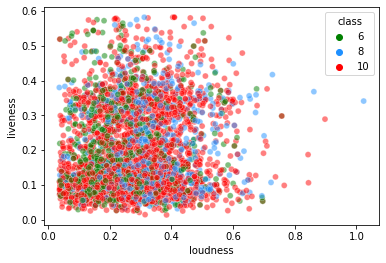

In [ ]:
#cat_features = ["Artist Name","mode",'key',"time_signature"]
# ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
g = sns.scatterplot(data = clean_df ,x= "loudness", y = "liveness" , hue = "class",alpha=0.5, palette=['green','dodgerblue','red'], legend='full')
#g.set(xscale="log")

In [ ]:
x_.drop("class", axis = 1 , inplace= True)

In [ ]:
Quantile_num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
x_[Quantile_num_features] = pd.DataFrame(skewed_scaler.fit_transform(x_[Quantile_num_features]), columns=Quantile_num_features)
x_test[Quantile_num_features] = pd.DataFrame(skewed_scaler.fit_transform(x_test[Quantile_num_features]), columns=Quantile_num_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
#scaler = StandardScaler()
#x_ = pd.DataFrame(scaler.fit_transform(x_), columns=x_.columns)
#x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [ ]:
def dest_plots (data,rows=3,cols=4,figsize=(20,20)):
  fig ,ax = plt.subplots(rows,cols,figsize=figsize)
  i = j = 0
  for col in list(data.columns):
    sns.distplot(data[col],ax=ax[j][i]);
    i = i + 1
    if i == cols:
      j = j + 1
      i = 0
  plt.show()

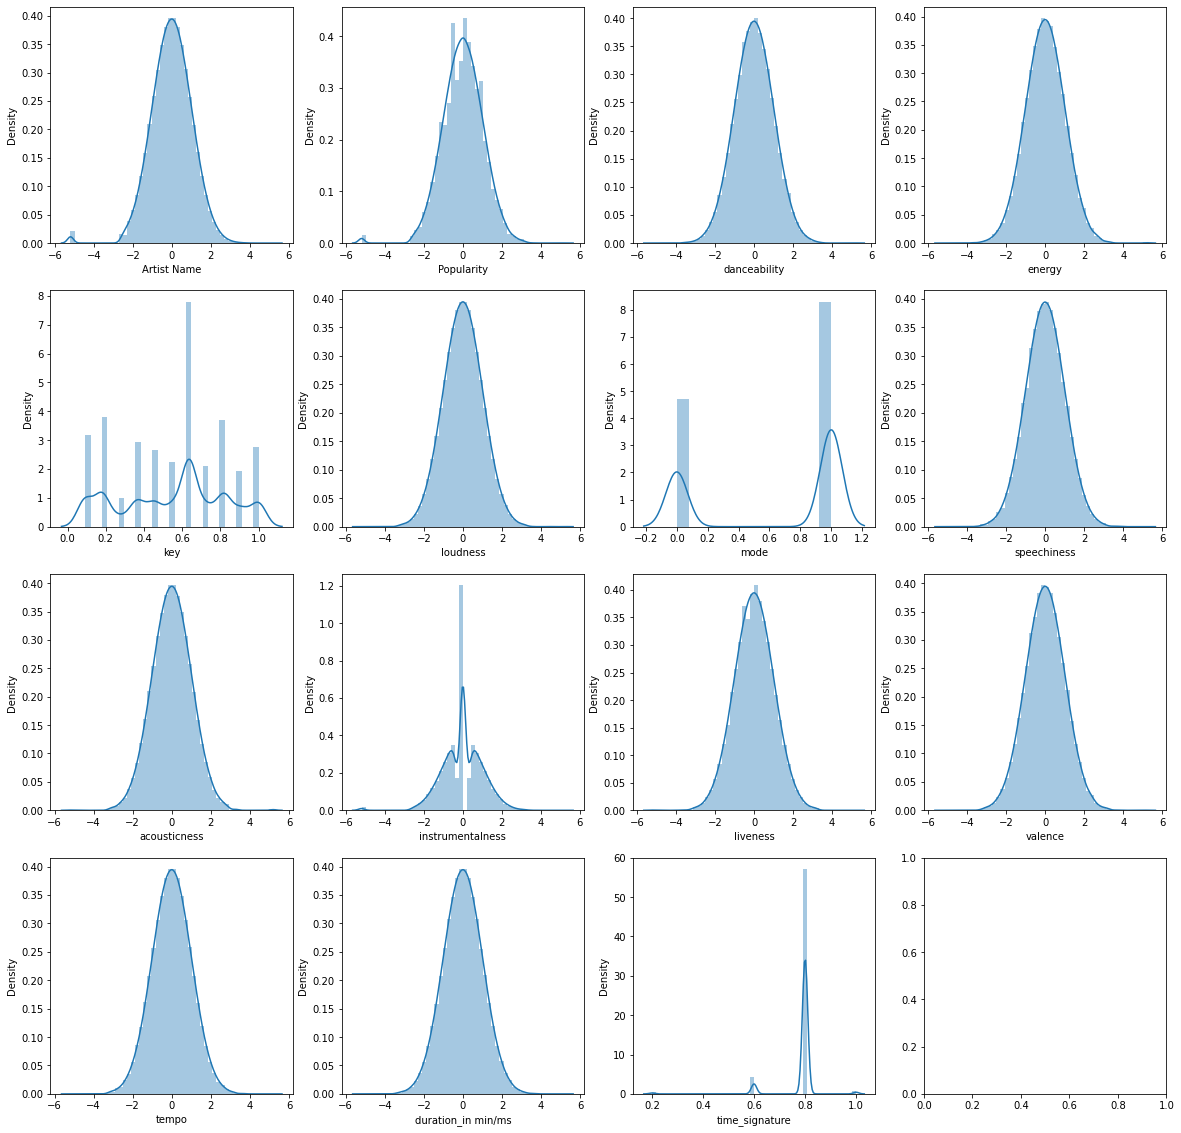

In [ ]:
dest_plots(data = x_, rows = 4 , cols = 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

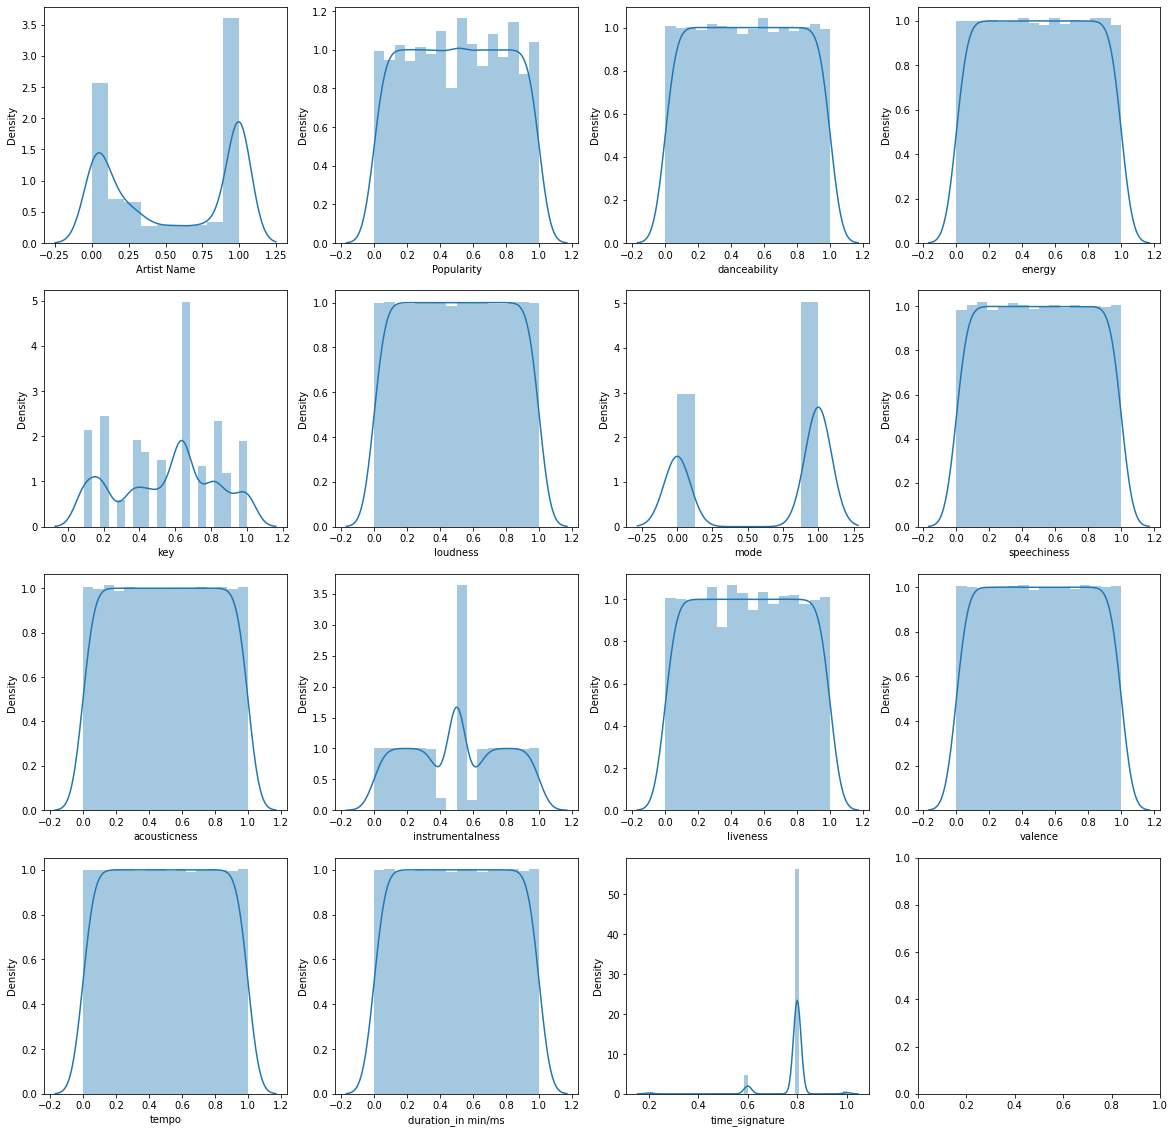

In [ ]:
dest_plots(data = x_test, rows = 4 , cols = 4)

In [ ]:
# x_.drop(["time_signature","key","duration_in min/ms"], axis = 1 , inplace = True )

In [ ]:
# cat_features = ["Artist Name","mode"]

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.25, random_state= 107)
for train_index, val_index in split.split(x_,y_):
  x_train = x_.iloc[train_index]
  y_train = y_.iloc[train_index]
  x_val = x_.iloc[val_index]
  y_val = y_.iloc[val_index]

In [ ]:
x_train["class"] = y_train  

In [ ]:
def outliers(df,column,a=25,b=75):
  x=df[column]
  q1, q3 = x.quantile(a/100),x.quantile(b/100)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  details_mat = [column,lower_bound,upper_bound, x.median()]
  print("<<<<<<<<",column,">>>>>>>>")
  print("lower bound: ",lower_bound)
  print("upper bound: ",upper_bound)
  mask = x.between( lower_bound, upper_bound, inclusive="both")
  inliers_mask = mask[mask==True]
  outliers_mask = mask[mask==False] # outliers
  return outliers_mask, inliers_mask, details_mat

In [ ]:
clean_df = x_train.copy()
outliers_df = x_train.copy()
details_mat = []
for col in clean_df.drop( cat_features+['class'], axis=1).columns:
  out, _ , mat= outliers(df= clean_df,column=col, a=5, b=95)
  details_mat = details_mat + [mat]
  clean_df = clean_df.drop(out.index,axis=0)
  print("min = ",clean_df [col].min())
  print("max = ",clean_df [col].max())
outliers_df = outliers_df[~outliers_df.isin(clean_df.to_dict("list")).all(axis=1)]
outliers_df.shape

<<<<<<<< Popularity >>>>>>>>
lower bound:  -0.7424242424242425
upper bound:  1.6414141414141414
min =  0.0
max =  1.0
<<<<<<<< danceability >>>>>>>>
lower bound:  -0.6839896707553251
upper bound:  1.7145470195825252
min =  0.0
max =  1.0
<<<<<<<< energy >>>>>>>>
lower bound:  -0.9539936597310232
upper bound:  2.1211439031243575
min =  0.0
max =  1.0
<<<<<<<< loudness >>>>>>>>
lower bound:  0.13392403224635047
upper bound:  1.3380201902825188
min =  0.14801365386012055
max =  0.9996852833660155
<<<<<<<< speechiness >>>>>>>>
lower bound:  -0.3823056300268097
upper bound:  0.6523324396782841
min =  0.0002144772117962518
max =  0.6396782841823057
<<<<<<<< acousticness >>>>>>>>
lower bound:  -1.3849829568273075
upper bound:  2.308419492971885
min =  0.0
max =  1.0
<<<<<<<< instrumentalness >>>>>>>>
lower bound:  -1.2962283270364714
upper bound:  2.1603873804090137
min =  0.0
max =  1.0
<<<<<<<< liveness >>>>>>>>
lower bound:  -0.6537408759124088
upper bound:  1.218521897810219
min =  0.0
ma

(27, 16)

In [ ]:
clean_df

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
13328,0.32,0.35,0.77,0.67,0.80,0.70,0.00,0.04,0.62,0.12,0.08,0.91,0.69,0.20,0.50,0
4878,0.99,0.60,0.34,0.53,0.90,0.75,1.00,0.01,0.48,0.51,0.12,0.28,0.23,0.20,0.75,0
9688,0.59,0.63,0.47,0.70,0.70,0.80,1.00,0.02,0.41,0.00,0.09,0.61,0.42,0.17,0.75,1
13730,0.38,0.35,0.26,0.64,0.90,0.77,0.00,0.02,0.32,0.00,0.09,0.27,0.50,0.21,0.75,1
9542,0.02,0.48,0.27,0.63,0.10,0.78,0.00,0.02,0.05,0.08,0.17,0.17,0.47,0.31,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,0.88,0.34,0.22,0.78,0.60,0.77,0.00,0.05,0.00,0.00,0.30,0.15,0.74,0.22,0.50,0
9125,0.37,0.64,0.42,0.35,0.40,0.57,1.00,0.02,0.15,0.00,0.07,0.22,0.78,0.21,0.75,1
2165,0.68,0.58,0.62,0.65,0.20,0.80,0.00,0.02,0.36,0.00,0.61,0.67,0.34,0.00,0.75,0
668,0.00,0.42,0.33,0.16,0.40,0.61,0.00,0.01,0.90,0.00,0.13,0.23,0.24,0.00,0.75,0


In [ ]:
details_df = pd.DataFrame(details_mat, columns= ["feature","lower_bound","upper_bound","median_"])
details_df

,feature,lower_bound,upper_bound,median_
0,Popularity,-0.74,1.64,0.43
1,danceability,-0.68,1.71,0.52
2,energy,-0.95,2.12,0.70
3,loudness,0.13,1.34,0.80
4,speechiness,-0.38,0.65,0.03
5,acousticness,-1.38,2.31,0.09
6,instrumentalness,-1.30,2.16,0.00
7,liveness,-0.65,1.22,0.12
8,valence,-1.13,2.12,0.48
9,tempo,-0.55,1.56,0.47


In [ ]:
def impute_outliers(data, details):
  cln_df = data.copy()
  detail_df = details.copy()
  for col in cln_df.drop(cat_features+['class'], axis=1).columns:
    lower_bound = float(detail_df[detail_df["feature"]==col].lower_bound)
    upper_bound = float(detail_df[detail_df["feature"]==col].upper_bound)
    median = float(detail_df[detail_df["feature"]==col].median_)
    mask = cln_df[col].between( lower_bound, upper_bound, inclusive="both")
    out = mask[mask==False] # outliers
    cln_df[col].where(out , inplace = True)
    cln_df[col].fillna(median,inplace = True)  
  print(cln_df.shape)
  return cln_df

In [ ]:
clean_df1 = impute_outliers(data = outliers_df, details = details_df)
clean_df1

(27, 16)


,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
5927,0.19,0.41,0.06,0.40,0.60,0.63,0.00,0.02,0.87,0.14,0.34,0.05,0.22,0.14,0.75,0
10774,0.13,0.18,0.36,0.77,0.10,0.78,0.00,0.02,0.35,0.84,0.08,0.77,0.31,0.14,0.75,0
10359,0.03,0.34,0.30,0.62,1.00,0.79,1.00,0.09,0.37,0.04,0.78,0.52,0.75,0.14,0.50,0
1762,0.26,0.07,0.74,0.10,0.10,0.51,1.00,0.03,0.99,0.00,0.11,0.36,0.30,0.04,0.75,0
12444,0.31,0.38,0.40,0.87,0.90,0.77,0.00,0.02,0.15,0.80,0.95,0.71,0.50,0.14,0.75,1
4885,0.98,0.11,0.70,0.39,0.10,0.61,1.00,0.03,0.92,0.00,0.16,0.47,0.44,0.21,0.75,0
9533,0.58,0.28,0.10,0.11,0.60,0.52,1.00,0.01,0.92,0.93,0.07,0.07,0.15,0.14,0.75,0
10160,0.63,0.13,0.68,0.13,0.60,0.51,1.00,0.03,0.94,0.00,0.08,0.37,0.30,0.04,0.75,0
9844,0.55,0.11,0.72,0.15,0.30,0.54,1.00,0.03,0.45,0.00,0.36,0.25,0.20,0.17,0.75,0
3503,0.68,0.16,0.40,0.65,0.60,0.79,1.00,0.01,0.32,0.16,0.70,0.53,0.41,0.14,0.75,1


In [ ]:
clean_df = pd.concat([clean_df, clean_df1])

In [ ]:
clean_df.shape

(10398, 16)

In [ ]:
x_train.shape

(10398, 16)

In [ ]:
y_train_ = clean_df["class"]
x_train_ = clean_df.drop("class",axis = 1) 

In [ ]:
y_train_ = y_train
x_train_ = x_train

# Data augmentation
Synthetic Minority Oversampling Technique SMOTE 
[SMOTE for Imbalanced Classification](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)



In [ ]:
# Data augmentation
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
oversample= SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x1 , y1 = oversample.fit_resample(x_train_,y_train_)

In [ ]:
x1.shape

(32202, 15)

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC

In [ ]:
x_train_.columns

Index(['Artist Name', 'Popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature',
       'class'],
      dtype='object')

# res

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
def split(data,cat_col):
  """
  data : input dataframe
  cat_col : string represent the name of column that i would split the dataframe using its' values. 
  output: is a dictionary key is the class name and value is the cooresponding dataframe
  """
  output= {}
  for class_ in list(data[cat_col].unique()):
    output[class_] = data[data[cat_col] == class_]
  return output

In [ ]:
x_train_["class"] = y_train_

In [ ]:
dfs = split(x_train_, "class")

class 10 , 6 ,8

In [ ]:
x_train_10_6_8 = pd.concat([dfs[10],dfs[6],dfs[8]])
x_train_10_6_8

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
12801,0.05,0.77,0.16,0.96,1.00,0.86,0.00,0.69,0.07,0.50,0.83,0.78,0.23,0.62,0.80,10
4989,0.01,0.95,0.90,0.63,0.27,0.23,1.00,0.20,0.35,0.88,0.02,0.99,0.58,0.80,0.80,10
3469,0.00,0.95,0.53,0.65,0.91,0.34,1.00,0.63,0.19,0.32,0.20,0.64,0.68,0.72,0.80,10
8906,0.38,0.89,0.32,0.76,1.00,0.25,0.00,0.80,0.35,0.32,0.11,0.75,0.46,0.68,0.80,10
14122,0.03,0.16,0.28,0.72,0.82,0.83,1.00,0.42,0.16,0.75,0.88,0.70,0.12,0.36,0.80,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11260,0.62,0.21,0.47,0.82,0.73,0.77,1.00,0.67,0.33,0.15,0.72,0.30,0.75,0.30,0.80,8
11172,0.63,0.04,0.51,0.98,0.18,0.80,1.00,0.77,0.10,0.35,0.71,0.17,0.17,0.74,0.80,8
3393,0.73,0.27,0.17,0.84,0.09,0.55,1.00,0.75,0.00,0.94,0.81,0.53,0.97,0.23,0.80,8
1570,0.12,0.64,0.02,0.85,1.00,0.82,1.00,0.85,0.00,0.83,0.66,0.30,0.82,0.81,0.80,8


In [ ]:
y_train_10_6_8 = x_train_10_6_8["class"]
x_train_10_6_8 = x_train_10_6_8.drop("class",axis = 1) 

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
LGBM_clf = LGBMClassifier()
y_train_pred = cross_val_predict(LGBM_clf,x_train_,y_train_,cv=3)
conf_mx = confusion_matrix(y_train_,y_train_pred)
conf_mx

array([[7429,    0],
       [   0, 2969]])

In [ ]:
row_sums = conf_mx.sum(axis= 1 , keepdims=True)
norm_conf_mx = conf_mx/row_sums

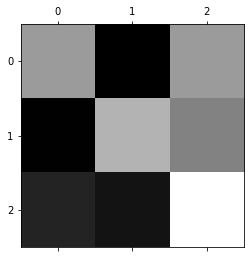

In [ ]:
#np.fill_diagonal(norm_conf_mx,0)
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

In [ ]:
x_train_10_6_8["class"] = y_train_10_6_8

In [ ]:
sns.pairplot(data =x_train_10_6_8, hue= "class")

In [ ]:
LGBM_clf = LGBMClassifier()
LGBM_clf.fit(x_train_, y_train_)
y_pred = LGBM_clf.predict(x_val)
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='weighted')

0.5399849573569708

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(LGBM_clf,x_train_,y_train_,cv=3)
conf_mx = confusion_matrix(y_train_,y_train_pred)
conf_mx

array([[ 298,    0,    0,   13,   24,    0,    0,   14,    0,   11,   15],
       [   0,   26,   26,    0,    0,   27,  246,    0,   35,   63,  400],
       [   1,   16,  341,    0,    0,   15,   84,    0,    7,   58,  241],
       [  32,    0,    0,  182,   10,    0,    1,    6,    0,    4,    7],
       [  48,    0,    0,    3,  159,    0,    0,    0,    0,   10,   13],
       [   1,    9,   13,    0,    0,  604,   38,    0,    4,  133,   66],
       [   2,  124,   68,    0,    0,   52,  518,    0,   62,  134,  592],
       [  10,    0,    0,    7,    1,    0,    1,  327,    0,    0,    0],
       [   2,    4,    3,    0,    0,    1,   42,    0,  614,    4,  442],
       [  15,   13,   50,    2,   13,  142,  143,    1,    6,  829,  300],
       [   3,   62,  140,    6,   19,   49,  262,    0,  277,  177, 1974]])

In [ ]:
y_train_.value_counts()

10    2969
6     1552
9     1514
8     1112
5      868
1      823
2      763
0      375
7      346
3      242
4      233
Name: class, dtype: int64

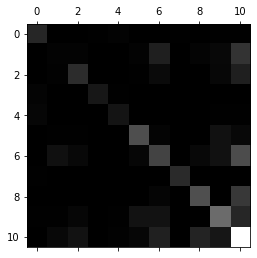

In [ ]:
plt.matshow(conf_mx,cmap= plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis= 1 , keepdims=True)
norm_conf_mx = conf_mx/row_sums
norm_conf_mx
norm_row_sums = norm_conf_mx.sum(axis= 1 , keepdims=True)
norm_row_sums

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

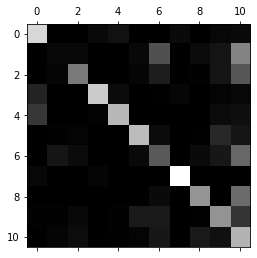

In [ ]:
#np.fill_diagonal(norm_conf_mx,0)
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

In [ ]:
XGB_clf = XGBClassifier()
XGB_clf.fit(x_train_, y_train_)
y_pred = XGB_clf.predict(x_val)
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='weighted')

0.531328788120819

In [ ]:
random_state_= 107
#,("EXTRAT_clf",ExtraTreesClassifier(n_estimators=1000,random_state=random_state_)),("SVM_clf",SVC(random_state=random_state_))
classifiers_list =[("LGBM_clf",LGBMClassifier(n_estimators=1000,random_state=random_state_)),("XGB_clf",XGBClassifier(n_estimators=1000,random_state=random_state_)),("RF_clf",RandomForestClassifier(n_estimators=1000,random_state=random_state_))]
vote_clf = VotingClassifier(estimators=classifiers_list, voting='hard')
vote_clf.fit(x_train_.drop("loudness",axis=1), y_train_)

VotingClassifier(estimators=[('LGBM_clf',
                              LGBMClassifier(n_estimators=1000,
                                             random_state=107)),
                             ('XGB_clf',
                              XGBClassifier(n_estimators=1000,
                                            random_state=107)),
                             ('RF_clf',
                              RandomForestClassifier(n_estimators=1000,
                                                     random_state=107))])

In [ ]:
y_pred = vote_clf.predict(x_val.drop("loudness",axis=1))
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='weighted')

0.5276750565736533

In [ ]:
classifiers_list =[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC]
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifiers_list)#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
models,predictions = clf.fit(x_train_, x_val, y_train_, y_val) #x_train , x_test , y_train , y_test
#models,predictions = clf.fit(x1, x_val, y1, y_val).drop("loudness",axis=1)

100%|██████████| 5/5 [00:24<00:00,  4.91s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.56,0.59,None,0.54,5.72
XGBClassifier,0.56,0.58,None,0.53,6.77
RandomForestClassifier,0.52,0.56,None,0.50,2.87
ExtraTreesClassifier,0.51,0.54,None,0.49,1.45
SVC,0.52,0.52,None,0.49,7.71


# without quantile transform

with standrization

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC])#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
for col in list(x_train_.columns):
  print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<",col,">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
  x_train1 = x_train_.drop(col,axis=1)
  x_val1 = x_val.drop(col,axis=1)
  models,predictions = clf.fit(x_train1, x_val1, y_train_, y_val)
  display(models)

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Artist Name >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


100%|██████████| 5/5 [00:21<00:00,  4.38s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.56,None,0.52,3.16
XGBClassifier,0.53,0.55,None,0.51,6.16
ExtraTreesClassifier,0.51,0.55,None,0.49,1.36
RandomForestClassifier,0.51,0.55,None,0.49,2.74
SVC,0.52,0.54,None,0.49,8.45


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Popularity >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.26s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.56,None,0.52,3.14
XGBClassifier,0.55,0.56,None,0.52,6.37
RandomForestClassifier,0.51,0.53,None,0.49,2.85
ExtraTreesClassifier,0.50,0.52,None,0.48,1.35
SVC,0.52,0.51,None,0.48,7.56


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< danceability >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.58,None,0.53,3.07
XGBClassifier,0.55,0.58,None,0.52,6.34
RandomForestClassifier,0.52,0.57,None,0.51,2.78
ExtraTreesClassifier,0.51,0.54,None,0.49,1.45
SVC,0.52,0.53,None,0.49,7.55


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< energy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.47s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.58,None,0.53,3.06
XGBClassifier,0.55,0.57,None,0.52,6.26
RandomForestClassifier,0.52,0.56,None,0.51,2.82
ExtraTreesClassifier,0.51,0.55,None,0.49,1.35
SVC,0.52,0.52,None,0.49,8.85


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< key >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.43s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.22
XGBClassifier,0.56,0.58,None,0.54,6.39
RandomForestClassifier,0.53,0.57,None,0.51,2.89
ExtraTreesClassifier,0.51,0.55,None,0.49,1.33
SVC,0.53,0.54,None,0.50,8.30


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< loudness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.14s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.55,0.58,None,0.53,6.04
LGBMClassifier,0.55,0.57,None,0.53,3.03
RandomForestClassifier,0.53,0.57,None,0.51,2.78
ExtraTreesClassifier,0.51,0.54,None,0.50,1.35
SVC,0.52,0.53,None,0.49,7.49


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< mode >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.28s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.56,0.59,None,0.54,3.19
XGBClassifier,0.56,0.58,None,0.54,6.48
RandomForestClassifier,0.53,0.57,None,0.51,3.02
ExtraTreesClassifier,0.52,0.55,None,0.50,1.38
SVC,0.53,0.54,None,0.50,7.34


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< speechiness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.58,None,0.53,3.05
XGBClassifier,0.54,0.56,None,0.51,6.31
RandomForestClassifier,0.51,0.56,None,0.50,2.75
ExtraTreesClassifier,0.50,0.54,None,0.49,1.38
SVC,0.51,0.51,None,0.47,7.85


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< acousticness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.54s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.08
XGBClassifier,0.54,0.56,None,0.52,7.50
RandomForestClassifier,0.52,0.56,None,0.50,3.18
ExtraTreesClassifier,0.50,0.53,None,0.49,1.42
SVC,0.52,0.52,None,0.49,7.51


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< instrumentalness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.57,None,0.51,3.04
XGBClassifier,0.54,0.57,None,0.51,6.20
RandomForestClassifier,0.51,0.56,None,0.50,2.85
ExtraTreesClassifier,0.50,0.53,None,0.48,1.36
SVC,0.52,0.53,None,0.49,7.50


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< liveness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.16s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.06
XGBClassifier,0.56,0.58,None,0.53,6.30
RandomForestClassifier,0.53,0.58,None,0.52,2.78
ExtraTreesClassifier,0.51,0.55,None,0.50,1.36
SVC,0.52,0.53,None,0.49,7.32


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< valence >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.57,None,0.53,3.01
RandomForestClassifier,0.52,0.56,None,0.51,2.78
XGBClassifier,0.55,0.56,None,0.52,6.30
ExtraTreesClassifier,0.51,0.54,None,0.50,1.36
SVC,0.52,0.52,None,0.48,7.49


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< tempo >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.54,3.02
XGBClassifier,0.56,0.57,None,0.53,6.27
RandomForestClassifier,0.53,0.57,None,0.51,2.73
ExtraTreesClassifier,0.52,0.55,None,0.50,1.34
SVC,0.53,0.53,None,0.49,7.27


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< duration_in min/ms >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.44s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.51,0.46,None,0.48,3.37
XGBClassifier,0.50,0.43,None,0.47,6.59
ExtraTreesClassifier,0.46,0.40,None,0.44,1.35
RandomForestClassifier,0.46,0.40,None,0.44,2.82
SVC,0.48,0.40,None,0.44,8.07


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< time_signature >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.18
XGBClassifier,0.56,0.58,None,0.53,6.44
RandomForestClassifier,0.53,0.57,None,0.51,2.95
ExtraTreesClassifier,0.52,0.55,None,0.50,1.36
SVC,0.53,0.54,None,0.50,7.27


# quantile transform

without standarization +non augmanted

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC])#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
for col in list(x_train_.columns):
  print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<",col,">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
  x_train1 = x_train_.drop(col,axis=1)
  x_val1 = x_val.drop(col,axis=1)
  models,predictions = clf.fit(x_train1, x_val1, y_train_, y_val)
  display(models)


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Artist Name >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.56,None,0.51,3.31
XGBClassifier,0.54,0.55,None,0.51,6.26
RandomForestClassifier,0.51,0.54,None,0.49,2.77
SVC,0.52,0.52,None,0.49,7.39
ExtraTreesClassifier,0.50,0.52,None,0.48,1.36


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Popularity >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.28s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.56,None,0.52,3.11
XGBClassifier,0.55,0.56,None,0.52,6.39
RandomForestClassifier,0.51,0.55,None,0.50,2.89
ExtraTreesClassifier,0.49,0.51,None,0.47,1.42
SVC,0.51,0.50,None,0.48,7.58


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< danceability >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.37s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.57,None,0.52,3.07
XGBClassifier,0.55,0.57,None,0.52,6.91
RandomForestClassifier,0.52,0.56,None,0.51,2.84
SVC,0.52,0.52,None,0.49,7.65
ExtraTreesClassifier,0.49,0.51,None,0.47,1.36


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< energy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.34s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.58,None,0.53,3.06
XGBClassifier,0.55,0.57,None,0.52,6.72
RandomForestClassifier,0.52,0.57,None,0.51,3.03
SVC,0.52,0.52,None,0.49,7.49
ExtraTreesClassifier,0.49,0.51,None,0.48,1.36


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< key >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.54,3.14
RandomForestClassifier,0.53,0.58,None,0.52,3.43
XGBClassifier,0.56,0.57,None,0.53,6.41
SVC,0.53,0.53,None,0.50,7.27
ExtraTreesClassifier,0.51,0.53,None,0.49,1.35


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< loudness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.12s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.54,2.99
XGBClassifier,0.55,0.58,None,0.53,6.04
RandomForestClassifier,0.52,0.57,None,0.51,2.72
ExtraTreesClassifier,0.50,0.53,None,0.49,1.34
SVC,0.52,0.52,None,0.49,7.49


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< mode >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.56,0.59,None,0.54,3.13
XGBClassifier,0.56,0.57,None,0.53,6.40
RandomForestClassifier,0.53,0.57,None,0.52,2.91
ExtraTreesClassifier,0.51,0.53,None,0.49,1.36
SVC,0.53,0.52,None,0.50,7.33


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< speechiness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.21s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.03
XGBClassifier,0.54,0.56,None,0.51,6.32
RandomForestClassifier,0.51,0.55,None,0.50,2.74
ExtraTreesClassifier,0.49,0.52,None,0.47,1.33
SVC,0.51,0.51,None,0.48,7.64


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< acousticness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.58,None,0.53,3.02
XGBClassifier,0.54,0.56,None,0.51,6.08
RandomForestClassifier,0.51,0.55,None,0.49,2.82
SVC,0.52,0.51,None,0.48,7.61
ExtraTreesClassifier,0.49,0.50,None,0.47,1.34


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< instrumentalness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.19s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.57,None,0.52,2.99
XGBClassifier,0.54,0.56,None,0.51,6.12
RandomForestClassifier,0.51,0.55,None,0.49,2.83
SVC,0.52,0.52,None,0.49,7.67
ExtraTreesClassifier,0.49,0.51,None,0.47,1.34


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< liveness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.28s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.00
XGBClassifier,0.56,0.58,None,0.53,6.87
RandomForestClassifier,0.53,0.57,None,0.51,2.80
SVC,0.53,0.53,None,0.50,7.37
ExtraTreesClassifier,0.51,0.53,None,0.49,1.35


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< valence >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.18s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.57,None,0.53,3.02
RandomForestClassifier,0.52,0.56,None,0.51,2.78
XGBClassifier,0.55,0.56,None,0.52,6.28
SVC,0.52,0.51,None,0.49,7.45
ExtraTreesClassifier,0.49,0.51,None,0.47,1.33


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< tempo >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:20<00:00,  4.07s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.56,0.59,None,0.54,3.01
XGBClassifier,0.56,0.57,None,0.53,6.05
RandomForestClassifier,0.53,0.57,None,0.51,2.74
ExtraTreesClassifier,0.52,0.54,None,0.50,1.32
SVC,0.53,0.52,None,0.50,7.22


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< duration_in min/ms >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.42s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.50,0.45,None,0.48,3.38
XGBClassifier,0.50,0.44,None,0.47,6.55
RandomForestClassifier,0.46,0.41,None,0.45,2.81
SVC,0.48,0.40,None,0.45,7.98
ExtraTreesClassifier,0.45,0.40,None,0.43,1.36


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< time_signature >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.43s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.16
XGBClassifier,0.56,0.57,None,0.53,6.42
RandomForestClassifier,0.52,0.56,None,0.51,2.95
ExtraTreesClassifier,0.51,0.53,None,0.49,1.36
SVC,0.53,0.52,None,0.49,8.22


none standarization + augmanted

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC])#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
for col in list(x_train_.columns):
  print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<",col,">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
  x_train1 = x1.drop(col,axis=1)
  x_val1 = x_val.drop(col,axis=1)
  models,predictions = clf.fit(x_train1, x_val1, y1, y_val)
  display(models)

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Artist Name >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


100%|██████████| 5/5 [01:14<00:00, 14.94s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.49,0.59,None,0.47,28.82
LGBMClassifier,0.51,0.58,None,0.50,7.21
RandomForestClassifier,0.47,0.58,None,0.46,9.71
SVC,0.47,0.56,None,0.46,25.15
ExtraTreesClassifier,0.45,0.56,None,0.44,3.79


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Popularity >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:08<00:00, 13.67s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.50,0.58,None,0.48,23.23
LGBMClassifier,0.52,0.58,None,0.51,5.86
RandomForestClassifier,0.48,0.57,None,0.48,9.90
SVC,0.47,0.55,None,0.46,26.04
ExtraTreesClassifier,0.45,0.55,None,0.44,3.29


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< danceability >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:10<00:00, 14.08s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.61,None,0.52,6.05
XGBClassifier,0.51,0.60,None,0.50,23.22
RandomForestClassifier,0.50,0.60,None,0.49,13.07
ExtraTreesClassifier,0.48,0.58,None,0.47,3.61
SVC,0.47,0.57,None,0.47,24.45


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< energy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:07<00:00, 13.45s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.51,0.60,None,0.50,23.99
LGBMClassifier,0.53,0.60,None,0.52,6.01
RandomForestClassifier,0.49,0.60,None,0.48,9.69
ExtraTreesClassifier,0.47,0.57,None,0.46,3.34
SVC,0.48,0.56,None,0.47,24.22


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< key >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:05<00:00, 13.09s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.52,0.61,None,0.51,5.70
XGBClassifier,0.50,0.61,None,0.49,23.31
RandomForestClassifier,0.50,0.60,None,0.49,9.79
ExtraTreesClassifier,0.48,0.59,None,0.47,3.22
SVC,0.48,0.57,None,0.48,23.42


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< loudness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.28s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.61,None,0.52,5.82
XGBClassifier,0.51,0.60,None,0.50,23.56
RandomForestClassifier,0.50,0.59,None,0.49,9.67
ExtraTreesClassifier,0.47,0.57,None,0.46,3.22
SVC,0.47,0.56,None,0.47,24.14


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< mode >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:07<00:00, 13.45s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.51,0.60,None,0.50,23.95
LGBMClassifier,0.53,0.60,None,0.52,5.81
RandomForestClassifier,0.50,0.59,None,0.49,10.40
ExtraTreesClassifier,0.48,0.58,None,0.47,3.29
SVC,0.47,0.56,None,0.46,23.78


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< speechiness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:08<00:00, 13.60s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.50,0.60,None,0.49,22.72
LGBMClassifier,0.52,0.60,None,0.51,5.77
RandomForestClassifier,0.48,0.59,None,0.48,10.46
ExtraTreesClassifier,0.46,0.57,None,0.46,3.33
SVC,0.46,0.56,None,0.46,25.72


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< acousticness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:07<00:00, 13.46s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.60,None,0.52,6.16
XGBClassifier,0.50,0.60,None,0.49,23.33
RandomForestClassifier,0.49,0.59,None,0.48,9.76
ExtraTreesClassifier,0.46,0.56,None,0.45,3.29
SVC,0.47,0.56,None,0.46,24.77


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< instrumentalness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:07<00:00, 13.44s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.52,0.59,None,0.51,5.79
RandomForestClassifier,0.48,0.59,None,0.48,10.03
XGBClassifier,0.49,0.59,None,0.48,22.80
ExtraTreesClassifier,0.46,0.56,None,0.45,3.30
SVC,0.47,0.56,None,0.46,25.27


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< liveness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:05<00:00, 13.13s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.61,None,0.52,5.78
XGBClassifier,0.51,0.61,None,0.50,22.79
RandomForestClassifier,0.49,0.60,None,0.48,9.93
ExtraTreesClassifier,0.48,0.58,None,0.47,3.38
SVC,0.49,0.58,None,0.48,23.78


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< valence >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:07<00:00, 13.46s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.60,None,0.52,5.87
RandomForestClassifier,0.49,0.60,None,0.49,9.93
XGBClassifier,0.50,0.59,None,0.49,23.12
ExtraTreesClassifier,0.47,0.58,None,0.46,3.50
SVC,0.47,0.56,None,0.47,24.88


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< tempo >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.27s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.61,None,0.52,5.91
XGBClassifier,0.51,0.60,None,0.50,22.89
RandomForestClassifier,0.50,0.60,None,0.49,9.81
ExtraTreesClassifier,0.48,0.58,None,0.47,3.39
SVC,0.48,0.57,None,0.47,24.35


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< duration_in min/ms >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:14<00:00, 14.81s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.44,0.51,None,0.43,23.85
ExtraTreesClassifier,0.41,0.48,None,0.40,3.44
RandomForestClassifier,0.43,0.48,None,0.42,10.55
SVC,0.41,0.48,None,0.40,30.03
LGBMClassifier,0.47,0.48,None,0.46,6.19


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< time_signature >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.36s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.51,0.61,None,0.50,23.62
LGBMClassifier,0.53,0.60,None,0.52,5.78
RandomForestClassifier,0.50,0.60,None,0.49,10.85
ExtraTreesClassifier,0.48,0.58,None,0.47,3.30
SVC,0.48,0.57,None,0.47,23.24


standarization + augmanted

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC])#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
for col in list(x_train_.columns):
  print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<",col,">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
  x_train1 = x1.drop(col,axis=1)
  x_val1 = x_val.drop(col,axis=1)
  models,predictions = clf.fit(x_train1, x_val1, y1, y_val)
  display(models)

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Artist Name >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


100%|██████████| 5/5 [01:06<00:00, 13.36s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.48,0.59,None,0.47,24.12
LGBMClassifier,0.51,0.59,None,0.50,5.97
RandomForestClassifier,0.48,0.58,None,0.47,9.53
SVC,0.46,0.57,None,0.45,23.97
ExtraTreesClassifier,0.47,0.56,None,0.46,3.22


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Popularity >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:09<00:00, 13.93s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.49,0.59,None,0.48,25.22
LGBMClassifier,0.51,0.58,None,0.51,6.29
RandomForestClassifier,0.48,0.57,None,0.48,9.84
ExtraTreesClassifier,0.47,0.56,None,0.46,3.35
SVC,0.45,0.55,None,0.44,24.94


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< danceability >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.21s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.61,None,0.52,6.03
XGBClassifier,0.50,0.60,None,0.49,23.00
RandomForestClassifier,0.50,0.59,None,0.50,9.78
ExtraTreesClassifier,0.48,0.57,None,0.48,3.14
SVC,0.46,0.57,None,0.46,24.08


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< energy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.34s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.62,None,0.53,6.51
XGBClassifier,0.50,0.61,None,0.49,23.88
RandomForestClassifier,0.50,0.60,None,0.50,9.55
ExtraTreesClassifier,0.48,0.57,None,0.47,3.12
SVC,0.46,0.56,None,0.45,23.63


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< key >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:05<00:00, 13.12s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.52,0.62,None,0.52,6.01
XGBClassifier,0.50,0.61,None,0.49,23.49
RandomForestClassifier,0.50,0.60,None,0.50,9.92
SVC,0.48,0.58,None,0.47,23.02
ExtraTreesClassifier,0.48,0.57,None,0.47,3.13


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< loudness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.29s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.61,None,0.53,6.78
XGBClassifier,0.50,0.60,None,0.49,23.11
RandomForestClassifier,0.50,0.60,None,0.50,9.65
ExtraTreesClassifier,0.49,0.57,None,0.48,3.29
SVC,0.46,0.56,None,0.45,23.59


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< mode >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.34s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.62,None,0.53,5.98
XGBClassifier,0.50,0.60,None,0.49,23.96
RandomForestClassifier,0.50,0.60,None,0.50,10.44
ExtraTreesClassifier,0.49,0.59,None,0.48,3.24
SVC,0.47,0.57,None,0.46,23.09


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< speechiness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:08<00:00, 13.71s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.49,0.60,None,0.49,23.24
LGBMClassifier,0.52,0.60,None,0.51,6.03
RandomForestClassifier,0.49,0.59,None,0.49,9.75
ExtraTreesClassifier,0.47,0.56,None,0.46,3.25
SVC,0.45,0.56,None,0.45,26.28


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< acousticness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.33s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.52,0.60,None,0.52,6.10
XGBClassifier,0.49,0.59,None,0.48,23.27
RandomForestClassifier,0.50,0.59,None,0.49,9.81
ExtraTreesClassifier,0.48,0.56,None,0.47,3.29
SVC,0.45,0.55,None,0.45,24.15


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< instrumentalness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:07<00:00, 13.49s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.52,0.60,None,0.51,6.07
XGBClassifier,0.48,0.59,None,0.47,23.15
RandomForestClassifier,0.48,0.58,None,0.48,9.77
ExtraTreesClassifier,0.48,0.58,None,0.47,3.32
SVC,0.46,0.56,None,0.45,25.12


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< liveness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:05<00:00, 13.14s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.61,None,0.53,6.07
XGBClassifier,0.51,0.61,None,0.50,23.16
RandomForestClassifier,0.50,0.60,None,0.49,9.81
ExtraTreesClassifier,0.49,0.58,None,0.48,3.29
SVC,0.47,0.58,None,0.47,23.37


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< valence >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:06<00:00, 13.31s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.52,0.60,None,0.52,6.07
XGBClassifier,0.49,0.59,None,0.48,23.17
RandomForestClassifier,0.49,0.58,None,0.48,9.88
ExtraTreesClassifier,0.47,0.56,None,0.46,3.25
SVC,0.46,0.56,None,0.45,24.18


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< tempo >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:05<00:00, 13.13s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.62,None,0.53,6.10
XGBClassifier,0.51,0.61,None,0.50,23.04
RandomForestClassifier,0.51,0.60,None,0.51,10.18
SVC,0.47,0.58,None,0.46,23.10
ExtraTreesClassifier,0.49,0.58,None,0.48,3.22


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< duration_in min/ms >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:13<00:00, 14.70s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.44,0.51,None,0.44,23.83
RandomForestClassifier,0.45,0.50,None,0.44,10.24
LGBMClassifier,0.48,0.50,None,0.47,6.48
SVC,0.40,0.47,None,0.39,29.59
ExtraTreesClassifier,0.42,0.47,None,0.41,3.35


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< time_signature >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [01:07<00:00, 13.50s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.62,None,0.53,6.09
RandomForestClassifier,0.51,0.60,None,0.50,10.25
XGBClassifier,0.50,0.60,None,0.49,24.99
ExtraTreesClassifier,0.49,0.59,None,0.48,3.17
SVC,0.47,0.58,None,0.47,23.01


standarization +non augmanted

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC])#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
for col in list(x_train_.columns):
  print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<",col,">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
  x_train1 = x_train_.drop(col,axis=1)
  x_val1 = x_val.drop(col,axis=1)
  models,predictions = clf.fit(x_train1, x_val1, y_train_, y_val)
  display(models)


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Artist Name >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


100%|██████████| 5/5 [00:23<00:00,  4.70s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.56,None,0.52,5.59
XGBClassifier,0.53,0.55,None,0.51,6.18
RandomForestClassifier,0.51,0.54,None,0.49,2.79
SVC,0.52,0.53,None,0.49,7.57
ExtraTreesClassifier,0.49,0.51,None,0.47,1.39


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Popularity >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.56,None,0.52,3.21
XGBClassifier,0.54,0.55,None,0.51,6.44
RandomForestClassifier,0.51,0.54,None,0.49,2.86
ExtraTreesClassifier,0.49,0.51,None,0.47,1.40
SVC,0.51,0.49,None,0.48,7.69


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< danceability >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.28s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.57,None,0.52,3.09
XGBClassifier,0.55,0.57,None,0.52,6.40
RandomForestClassifier,0.52,0.56,None,0.51,2.89
ExtraTreesClassifier,0.50,0.52,None,0.48,1.38
SVC,0.52,0.52,None,0.49,7.66


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< energy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.50s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.58,None,0.53,3.14
RandomForestClassifier,0.52,0.57,None,0.51,2.82
XGBClassifier,0.55,0.57,None,0.52,7.07
ExtraTreesClassifier,0.51,0.53,None,0.49,1.38
SVC,0.52,0.51,None,0.49,8.10


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< key >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.44s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.50
XGBClassifier,0.56,0.58,None,0.53,6.48
RandomForestClassifier,0.53,0.57,None,0.52,2.98
ExtraTreesClassifier,0.52,0.54,None,0.50,1.37
SVC,0.53,0.52,None,0.50,7.83


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< loudness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.54,3.09
XGBClassifier,0.55,0.58,None,0.53,6.02
RandomForestClassifier,0.52,0.56,None,0.51,2.79
ExtraTreesClassifier,0.50,0.53,None,0.49,1.37
SVC,0.52,0.52,None,0.49,7.84


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< mode >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.33s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.54,3.29
XGBClassifier,0.56,0.57,None,0.53,6.41
RandomForestClassifier,0.53,0.57,None,0.52,3.02
ExtraTreesClassifier,0.52,0.54,None,0.50,1.40
SVC,0.52,0.52,None,0.49,7.52


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< speechiness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.59,None,0.53,3.07
XGBClassifier,0.54,0.56,None,0.51,6.34
RandomForestClassifier,0.51,0.55,None,0.49,2.81
ExtraTreesClassifier,0.48,0.51,None,0.47,1.37
SVC,0.51,0.50,None,0.48,7.74


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< acousticness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.24s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.12
RandomForestClassifier,0.52,0.56,None,0.50,2.86
XGBClassifier,0.54,0.56,None,0.52,6.16
ExtraTreesClassifier,0.49,0.51,None,0.47,1.35
SVC,0.51,0.50,None,0.48,7.69


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< instrumentalness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.58,None,0.52,3.02
XGBClassifier,0.54,0.56,None,0.51,6.24
RandomForestClassifier,0.51,0.55,None,0.50,2.91
SVC,0.52,0.51,None,0.48,7.54
ExtraTreesClassifier,0.49,0.51,None,0.47,1.36


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< liveness >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.33s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.54,3.10
XGBClassifier,0.56,0.58,None,0.53,6.51
RandomForestClassifier,0.53,0.57,None,0.52,2.86
SVC,0.53,0.53,None,0.49,7.79
ExtraTreesClassifier,0.50,0.53,None,0.48,1.39


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< valence >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.41s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.54,0.58,None,0.53,3.28
XGBClassifier,0.55,0.56,None,0.52,6.68
RandomForestClassifier,0.52,0.56,None,0.51,2.94
SVC,0.52,0.51,None,0.49,7.71
ExtraTreesClassifier,0.50,0.51,None,0.48,1.43


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< tempo >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.32s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.56,0.60,None,0.54,3.08
XGBClassifier,0.56,0.57,None,0.53,6.99
RandomForestClassifier,0.53,0.57,None,0.51,2.79
ExtraTreesClassifier,0.51,0.53,None,0.49,1.35
SVC,0.53,0.52,None,0.49,7.36


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< duration_in min/ms >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:22<00:00,  4.45s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.51,0.46,None,0.49,3.39
XGBClassifier,0.50,0.43,None,0.47,6.59
RandomForestClassifier,0.47,0.41,None,0.45,2.83
SVC,0.49,0.41,None,0.45,8.03
ExtraTreesClassifier,0.45,0.40,None,0.43,1.39


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< time_signature >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 5/5 [00:21<00:00,  4.31s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.55,0.59,None,0.53,3.18
XGBClassifier,0.56,0.57,None,0.53,6.54
RandomForestClassifier,0.52,0.57,None,0.51,2.98
SVC,0.52,0.52,None,0.49,7.47
ExtraTreesClassifier,0.50,0.52,None,0.48,1.38


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC])#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
models,predictions = clf.fit(x_train_.drop("loudness",axis=1), x_val.drop("loudness",axis=1), y_train_, y_val) #x_train , x_test , y_train , y_test
#models,predictions = clf.fit(x1, x_val, y1, y_val)

100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.57,0.61,None,0.55,3.09
XGBClassifier,0.56,0.59,None,0.53,6.59
RandomForestClassifier,0.53,0.57,None,0.51,2.81
ExtraTreesClassifier,0.51,0.53,None,0.49,1.37
SVC,0.51,0.52,None,0.48,7.50


# re-train for the final submetion

In [ ]:
x_

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.51,-1.29,-1.03,-0.12,7.00,-0.97,0,-0.11,1.29,-1.46,0.61,1.19,1.71,-1.17,3
1,-0.40,0.10,0.67,-0.24,6.00,-0.33,1,2.21,0.65,0.00,-0.19,0.73,-0.68,-0.05,4
2,-1.44,0.42,-0.51,0.12,11.00,-1.15,0,1.15,-0.14,0.54,-0.19,1.12,-1.55,0.17,4
3,0.21,-0.26,-0.22,-1.38,5.00,-0.51,0,0.02,1.36,0.00,-0.70,-0.57,-0.79,1.47,3
4,1.13,1.03,0.05,-0.75,9.00,-0.57,1,-0.83,0.80,0.77,0.28,0.11,-2.31,-0.16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,0.62,-0.13,-2.41,-1.79,1.00,-1.87,0,-0.32,1.45,2.03,1.36,-3.04,0.69,-1.36,3
14392,0.17,0.37,0.67,0.80,5.00,-0.01,1,0.15,-0.16,0.46,-0.82,1.56,1.04,0.22,4
14393,5.20,-0.20,0.88,-0.59,4.00,-0.31,0,1.15,0.65,-1.18,-0.42,0.63,-1.02,-0.23,4
14394,0.34,0.26,-0.78,-0.47,11.00,0.34,1,-0.40,0.49,0.00,0.61,-0.03,1.10,0.48,4


reuse all labeled data

In [ ]:
x_["class"] = y_  

In [ ]:
clean_df = x_.copy()
outliers_df = x_.copy()
details_mat = []
for col in clean_df.drop(cat_features+['class'], axis=1).columns:
  out, _ , mat= outliers(df= clean_df,column=col, a=5, b=95)
  details_mat = details_mat + [mat]
  clean_df = clean_df.drop(out.index,axis=0)
  print("min = ",clean_df [col].min())
  print("max = ",clean_df [col].max())
outliers_df = outliers_df[~outliers_df.isin(clean_df.to_dict("list")).all(axis=1)]
outliers_df.shape

<<<<<<<< Popularity >>>>>>>>
lower bound:  -6.65901062426113
upper bound:  6.674103616013713
min =  -5.199337582605575
max =  5.19933758270342
<<<<<<<< danceability >>>>>>>>
lower bound:  -6.577474147055352
upper bound:  6.577474147055352
min =  -5.199337582605575
max =  5.19933758270342
<<<<<<<< energy >>>>>>>>
lower bound:  -6.571747844320296
upper bound:  6.5663107545478825
min =  -5.199337582605575
max =  5.19933758270342
<<<<<<<< loudness >>>>>>>>
lower bound:  -6.57957428965298
upper bound:  6.579782092920125
min =  -5.199337582605575
max =  5.19933758270342
<<<<<<<< speechiness >>>>>>>>
lower bound:  -6.580248640925623
upper bound:  6.582098303505804
min =  -5.199337582605575
max =  5.19933758270342
<<<<<<<< acousticness >>>>>>>>
lower bound:  -6.578211632514164
upper bound:  6.577916638330639
min =  -5.199337582605575
max =  5.19933758270342
<<<<<<<< instrumentalness >>>>>>>>
lower bound:  -6.579910139790167
upper bound:  6.580883111393373
min =  -5.199337582605575
max =  5.199

(0, 16)

In [ ]:
clean_df

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class
0,0.51,-1.29,-1.03,-0.12,7.00,-0.97,0,-0.11,1.29,-1.46,0.61,1.19,1.71,-1.17,3,3
1,-0.40,0.10,0.67,-0.24,6.00,-0.33,1,2.21,0.65,0.00,-0.19,0.73,-0.68,-0.05,4,5
2,-1.44,0.42,-0.51,0.12,11.00,-1.15,0,1.15,-0.14,0.54,-0.19,1.12,-1.55,0.17,4,6
3,0.21,-0.26,-0.22,-1.38,5.00,-0.51,0,0.02,1.36,0.00,-0.70,-0.57,-0.79,1.47,3,9
4,1.13,1.03,0.05,-0.75,9.00,-0.57,1,-0.83,0.80,0.77,0.28,0.11,-2.31,-0.16,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,0.62,-0.13,-2.41,-1.79,1.00,-1.87,0,-0.32,1.45,2.03,1.36,-3.04,0.69,-1.36,3,7
14392,0.17,0.37,0.67,0.80,5.00,-0.01,1,0.15,-0.16,0.46,-0.82,1.56,1.04,0.22,4,10
14393,5.20,-0.20,0.88,-0.59,4.00,-0.31,0,1.15,0.65,-1.18,-0.42,0.63,-1.02,-0.23,4,9
14394,0.34,0.26,-0.78,-0.47,11.00,0.34,1,-0.40,0.49,0.00,0.61,-0.03,1.10,0.48,4,9


In [ ]:
details_df = pd.DataFrame(details_mat, columns= ["feature","lower_bound","upper_bound","median_"])
details_df

,feature,lower_bound,upper_bound,median_
0,Popularity,-6.66,6.67,0.02
1,danceability,-6.58,6.58,-0.00
2,energy,-6.57,6.57,-0.00
3,loudness,-6.58,6.58,-0.00
4,speechiness,-6.58,6.58,-0.00
5,acousticness,-6.58,6.58,0.00
6,instrumentalness,-6.58,6.58,0.00
7,liveness,-6.58,6.58,-0.00
8,valence,-6.58,6.58,0.00
9,tempo,-6.58,6.58,-0.00


In [ ]:
clean_df1 = impute_outliers(data = outliers_df, details = details_df)
clean_df1

(0, 16)


,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,class


In [ ]:
clean_df = pd.concat([clean_df, clean_df1])

In [ ]:
clean_df.shape

(14396, 16)

In [ ]:
y_ = clean_df["class"]
x_ = clean_df.drop("class",axis = 1) 

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier(n_estimators=1000)
model.fit(x_, y_)

LGBMClassifier(n_estimators=1000)

In [ ]:
y_pred = model.predict(x_test)
#y_pred = model.predict(x_test_imputed)

In [ ]:
res =[[i for i in range(3600)],list(y_pred)]
res

In [ ]:
df = pd.DataFrame (res).transpose()
df.columns = ['id', 'Class']
df

,id,Class
0,0,10
1,1,10
2,2,10
3,3,10
4,4,10
...,...,...
3595,3595,5
3596,3596,10
3597,3597,10
3598,3598,7


In [ ]:
df.to_csv("out25_75.csv",index=False )